### Chapter 5, Section 1: Area and Distance problems 

- Get familiar with notation and methods for calculating area under a function
- Recognize that distance is area of velocity*time.
- Problems: Paper (9, 11, 13).
- Problems: Jupyter (3, 5, 6, 15, 29). 
- See below for problem #3

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Set up symbolic variable
x = sp.Symbol('x')
t = sp.Symbol('t')

In [41]:
def riemann_sum(f, a, b, n, method='left'):
    """
    Compute Riemann sum for function f from a to b with n rectangles.
    method: 'left', 'right', or 'midpoint'
    """
    dx = (b - a) / n
    total = 0
    
    for i in range(n):
        if method == 'left':
            x_sample = a + i * dx
        elif method == 'right':
            x_sample = a + (i + 1) * dx
        else:  # midpoint
            x_sample = a + (i + 0.5) * dx
        
        total += f(x_sample) * dx
    
    return total

def plot_riemann_sum(f_expr, a, b, n, method='left'):
    """
    Plot function and visualize Riemann sum approximation.
    
    Parameters:
    - f_expr: sympy expression for the function
    - a, b: integration bounds
    - n: number of rectangles
    - method: 'left', 'right', or 'midpoint'
    """
    # Convert the sympy expression to numpy function
    f = sp.lambdify(x, f_expr, 'numpy')
    
    # Create fine x values for smooth curve
    x_vals = np.linspace(a, b, 500)
    y_vals = f(x_vals)
    
    # Calculate rectangle width
    dx = (b - a) / n
    
    # Plot the function
    plt.figure(figsize=(12, 8))
    plt.plot(x_vals, y_vals, color='blue', linewidth=2, label=f'f(x) = {f_expr}')
    
    # Draw rectangles and compute sum
    riemann_total = 0
    for i in range(n):
        # Determine sample point based on method
        if method == 'left':
            x_sample = a + i * dx
            x_left = a + i * dx
        elif method == 'right':
            x_sample = a + (i + 1) * dx
            x_left = a + i * dx
        else:  # midpoint
            x_sample = a + (i + 0.5) * dx
            x_left = a + i * dx
        
        height = f(x_sample)
        riemann_total += height * dx
        
        # Draw rectangle
        rect = plt.Rectangle((x_left, 0), dx, height, 
                            alpha=0.3, edgecolor='red', 
                            facecolor='green' if height > 0 else 'lightcoral')
        plt.gca().add_patch(rect)
        
        # Mark sample point
        plt.plot(x_sample, height, 'ro', markersize=4)
    
    # Compute exact integral if possible
    try:
        integral_expr = sp.integrate(f_expr, (x, a, b))
        exact_value = float(integral_expr.evalf())
        error = abs(riemann_total - exact_value)
        title = f'Riemann Sum ({method.capitalize()} Rule) with n={n}\n'
        title += f'Approximate Area: {riemann_total:.6f}\n'
        title += f'Exact Area: {exact_value:.6f} | Error: {error:.6f}'
    except:
        title = f'Riemann Sum ({method.capitalize()} Rule) with n={n}\n'
        title += f'Approximate Area: {riemann_total:.6f}'
    
    plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    plt.grid(True, alpha=0.3)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.title(title, fontsize=12)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()
    
    return riemann_total

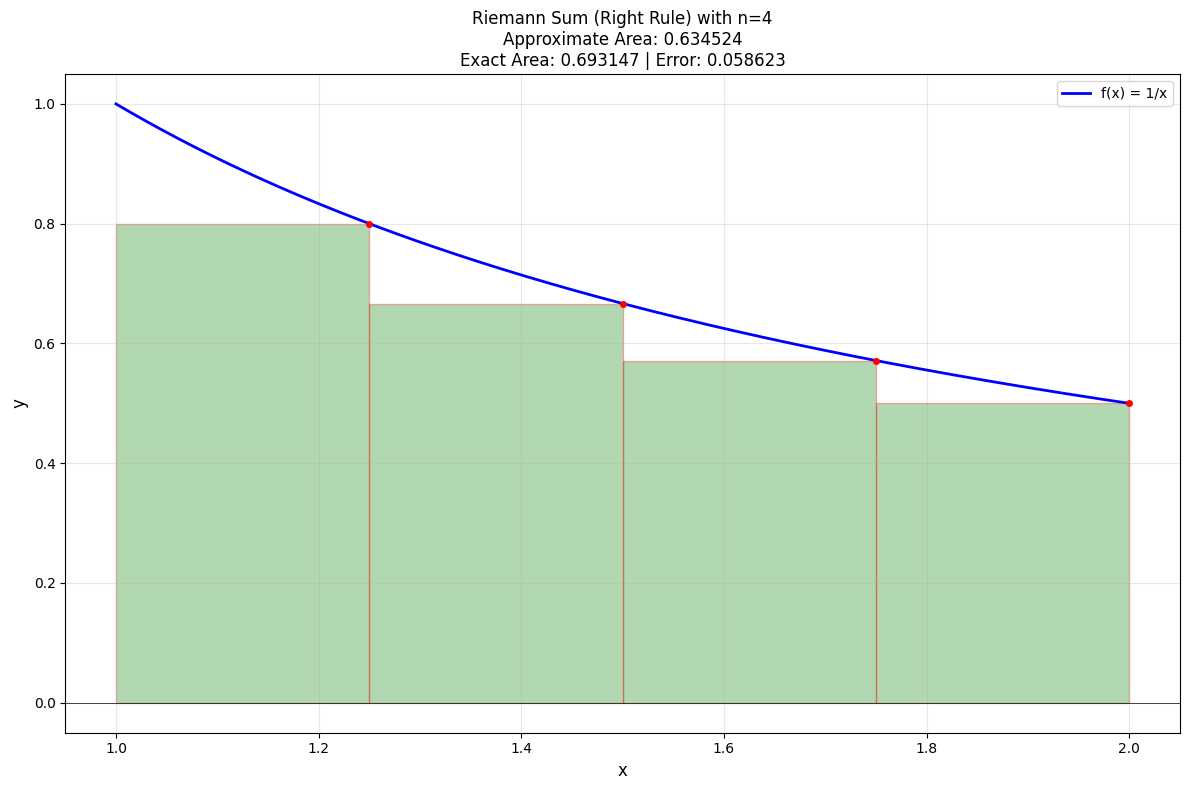

In [42]:
# problem 3(a)
# Specify the integration bounds
a = 1
b = 2
# Specify the function to integrate
f = 1/x
# Specify the number of rectangles
n = 4
# Specify the method: 'left', 'right', or 'midpoint'
method = 'right'
# Compute and visualize the Riemann sum
area = plot_riemann_sum(f, a, b, n, method)

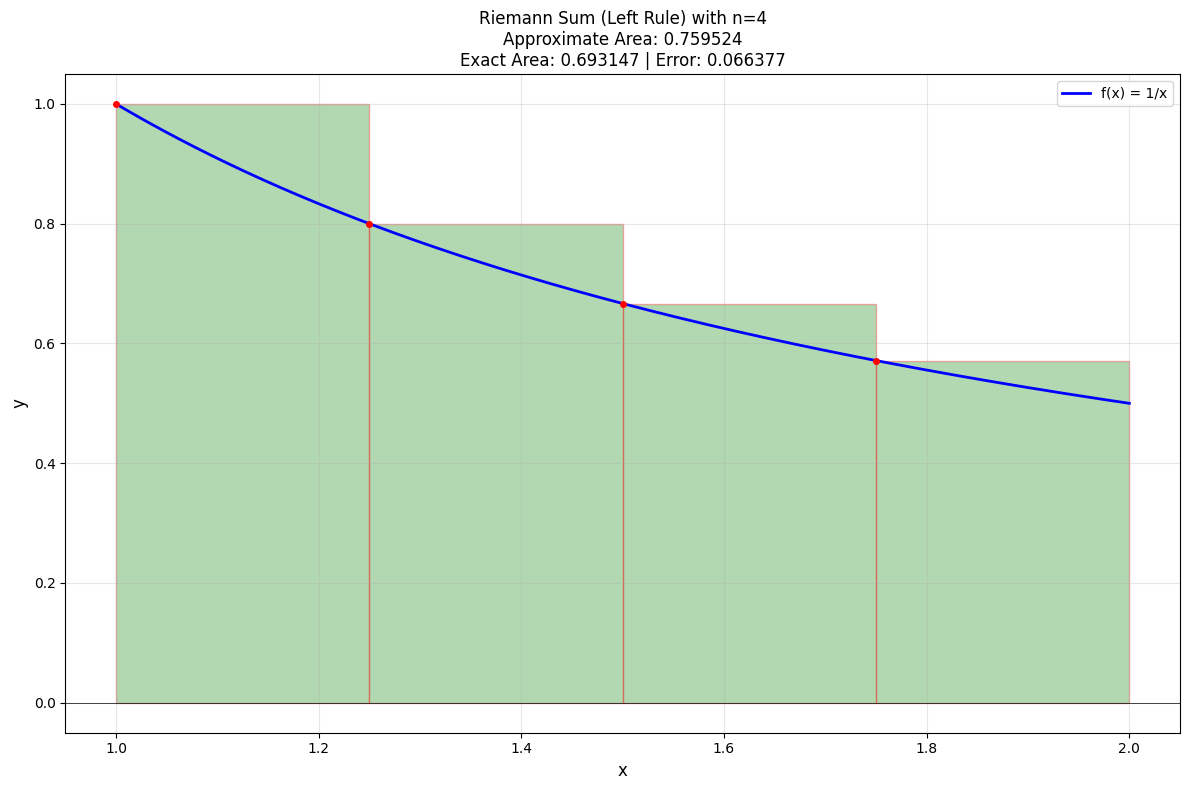

In [43]:
# problem 3(b)
# Specify the integration bounds
a = 1
b = 2
# Specify the function to integrate
f = 1/x
# Specify the number of rectangles
n = 4
# Specify the method: 'left', 'right', or 'midpoint'
method = 'left'
# Compute and visualize the Riemann sum
area = plot_riemann_sum(f, a, b, n, method)

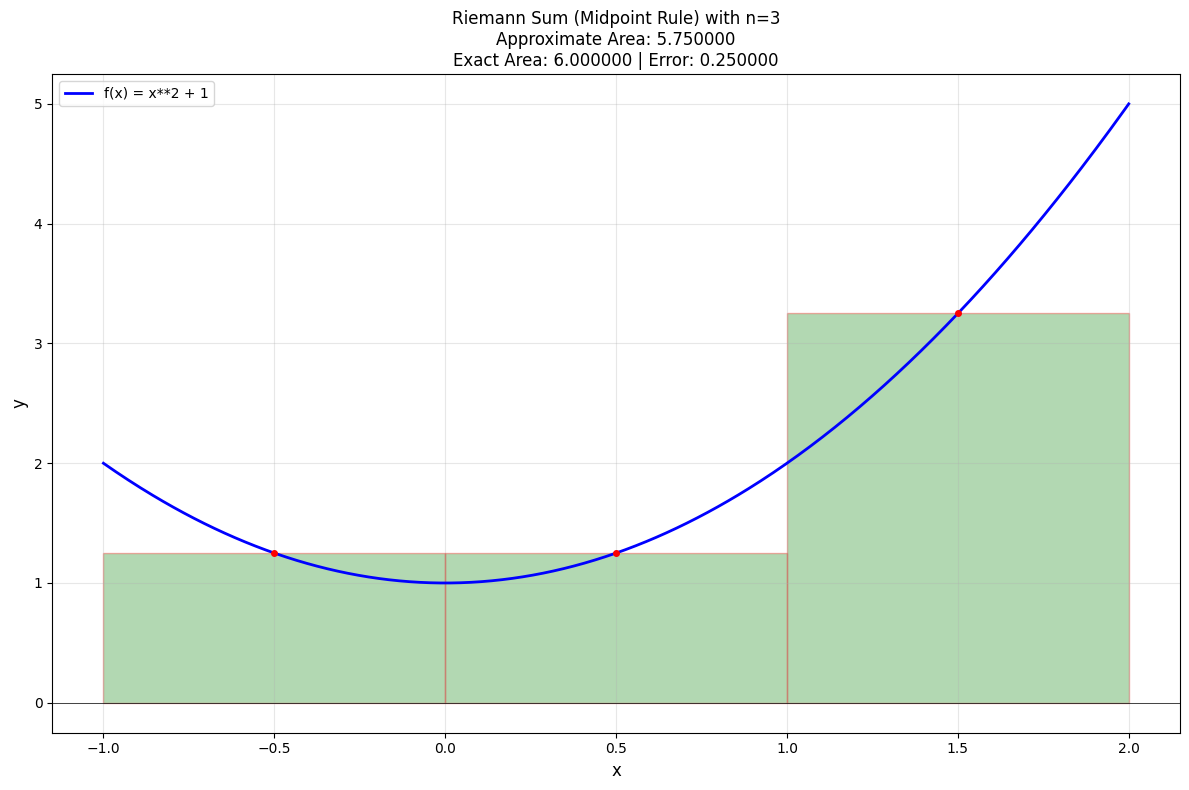

In [44]:
# problem 3(b)
# Specify the integration bounds
a = -1
b = 2
# Specify the function to integrate
f = 1+x**2
# Specify the number of rectangles
n = 3
# Specify the method: 'left', 'right', or 'midpoint'
method = 'midpoint'
# Compute and visualize the Riemann sum
area = plot_riemann_sum(f, a, b, n, method)

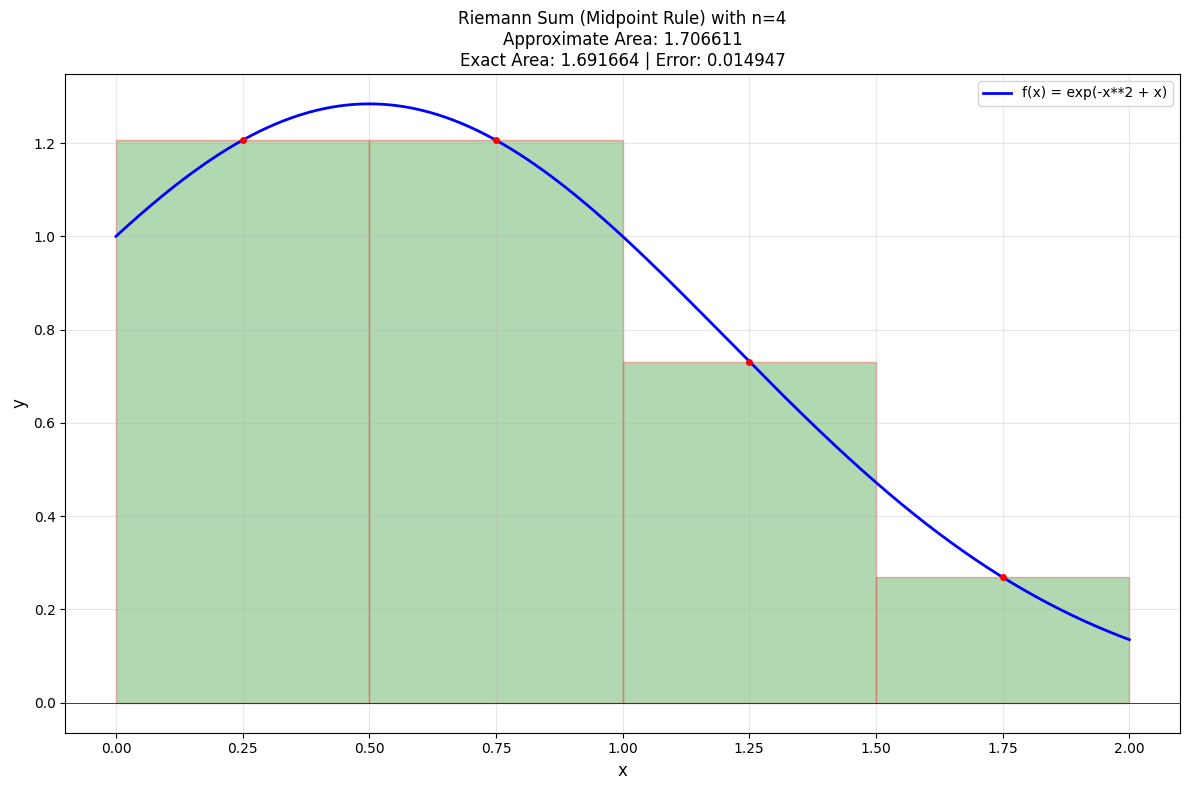

In [45]:
# problem 3(b)
# Specify the integration bounds
a = 0
b = 2
# Specify the function to integrate
f = sp.exp(x-x**2)
# Specify the number of rectangles
n = 4
# Specify the method: 'left', 'right', or 'midpoint'
method = 'midpoint'
# Compute and visualize the Riemann sum
area = plot_riemann_sum(f, a, b, n, method)

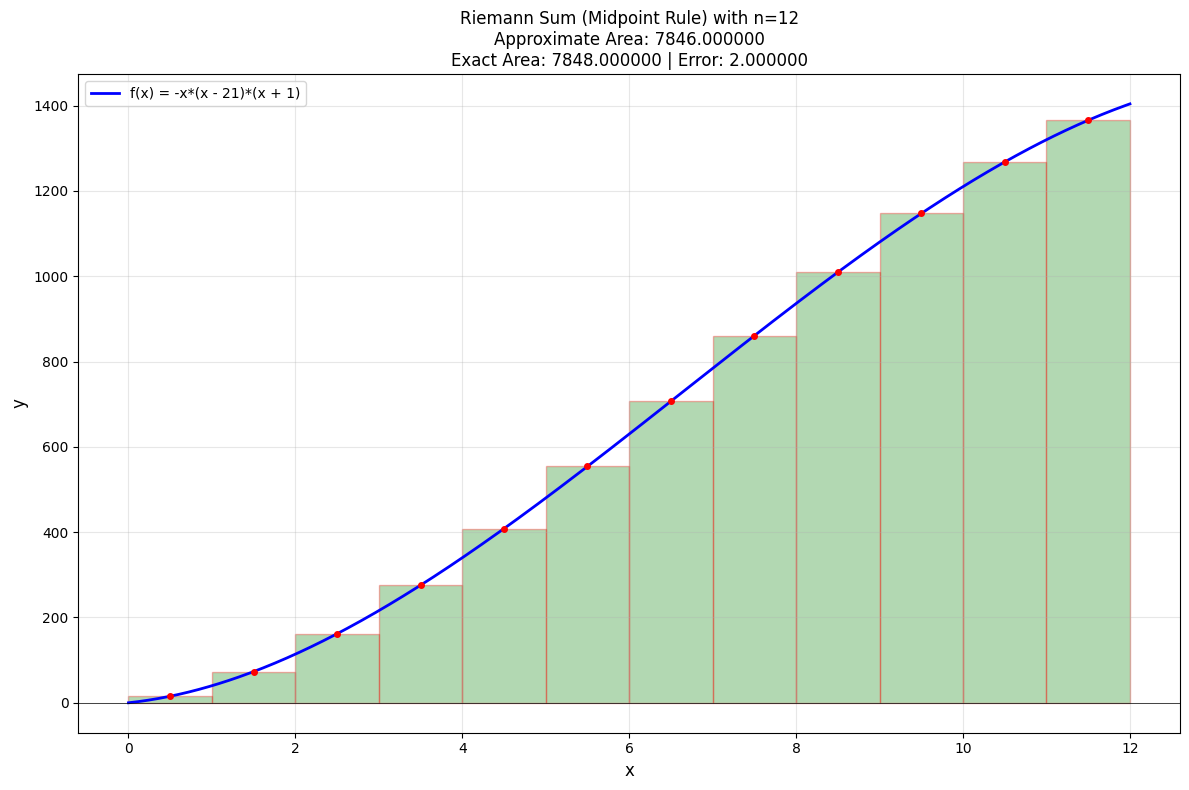

In [46]:
# problem 3(b)
# Specify the integration bounds
a = 0
b = 12
# Specify the function to integrate
f = -x*(x-21)*(x+1)
# Specify the number of rectangles
n = 12
# Specify the method: 'left', 'right', or 'midpoint'
method = 'midpoint'
# Compute and visualize the Riemann sum
area = plot_riemann_sum(f, a, b, n, method)

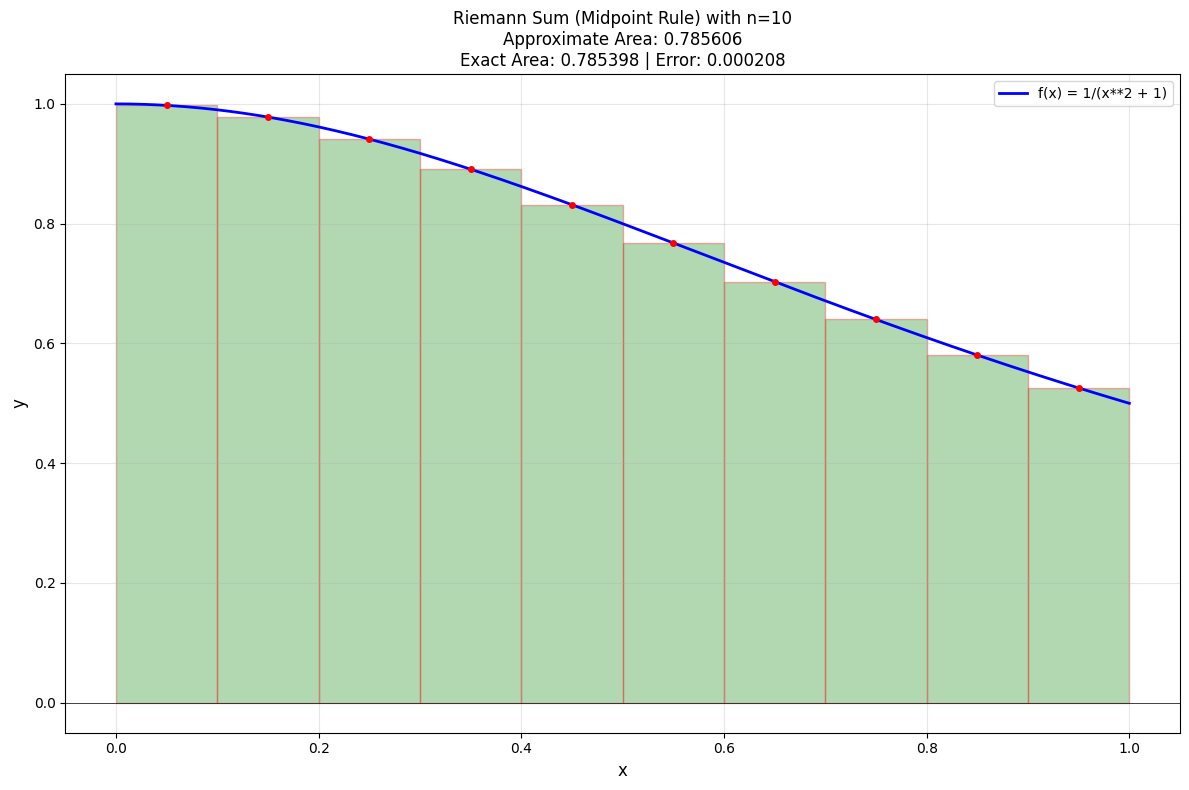

In [47]:
# problem 3(b)
# Specify the integration bounds
a = 0
b = 1
# Specify the function to integrate
f = 1/(x**2+1)
# Specify the number of rectangles
n = 10
# Specify the method: 'left', 'right', or 'midpoint'
method = 'midpoint'
# Compute and visualize the Riemann sum
area = plot_riemann_sum(f, a, b, n, method)